<a href="https://colab.research.google.com/github/iammannat03/lstm-stock-prediction/blob/main/lstm_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prediction Using LSTM

We used Keras and TensorFlow in this

**Steps to Follow**
1. We will collect the stock data - AAPL
2. Preprocess the data - Train and Test
3. Create a stacked LSTM model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output

In [ ]:
!pip install python-dotenv==0.21.0

In [ ]:
!pip install pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0,

In [ ]:
### Data collection
from google.colab import userdata

API_KEY=userdata.get('API_KEY')

import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=API_KEY);

<ipython-input-5-944a1af60c6a>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=API_KEY);


In [ ]:
df.to_csv("AAPL.csv")

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("AAPL.csv")

In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1250,AAPL,2025-02-27 00:00:00+00:00,237.30,242.4600,237.060,239.410,41153639,237.30,242.4600,237.060,239.410,41153639,0.0,1.0
1251,AAPL,2025-02-28 00:00:00+00:00,241.84,242.0900,230.200,236.950,56833360,241.84,242.0900,230.200,236.950,56833360,0.0,1.0
1252,AAPL,2025-03-03 00:00:00+00:00,238.03,244.0272,236.112,241.790,47183985,238.03,244.0272,236.112,241.790,47183985,0.0,1.0
1253,AAPL,2025-03-04 00:00:00+00:00,235.93,240.0700,234.680,237.705,53798062,235.93,240.0700,234.680,237.705,53798062,0.0,1.0
1254,AAPL,2025-03-05 00:00:00+00:00,235.74,236.5500,229.230,235.420,47227643,235.74,236.5500,229.230,235.420,47227643,0.0,1.0


In [ ]:
df1=df.reset_index()["close"]
df1

,close
0,266.17
1,285.34
2,275.43
3,248.23
4,277.97
...,...
1250,237.30
1251,241.84
1252,238.03
1253,235.93


In [ ]:
df1.shape

(1255,)

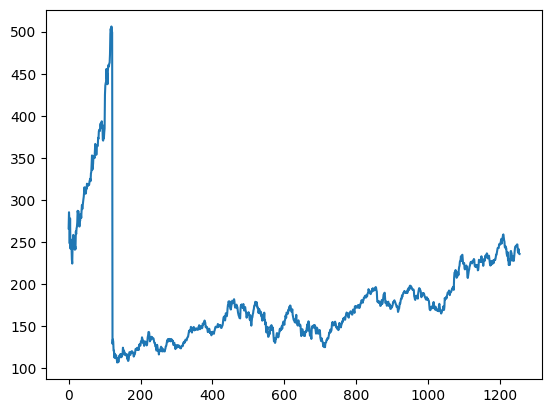

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data.
### So we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.39907326],
       [0.44708829],
       [0.42226675],
       ...,
       [0.32859111],
       [0.32333125],
       [0.32285535]])

# Time Series data
here we are dividing the data based on date


In [ ]:
# splitting the dataset into train and test
training_size = int(len(df1)*0.65)
training_size

test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(815, 440)

In [ ]:
train_data

array([[3.99073262e-01],
       [4.47088291e-01],
       [4.22266750e-01],
       [3.54139011e-01],
       [4.28628679e-01],
       [3.39060739e-01],
       [3.65735755e-01],
       [3.50231684e-01],
       [3.45497808e-01],
       [3.06574828e-01],
       [2.94376957e-01],
       [3.50757671e-01],
       [3.47351284e-01],
       [3.79711960e-01],
       [3.52911709e-01],
       [3.70619912e-01],
       [3.69317470e-01],
       [3.35804634e-01],
       [3.45873513e-01],
       [3.37056982e-01],
       [3.89805886e-01],
       [3.82191609e-01],
       [3.98822793e-01],
       [4.03631810e-01],
       [4.16806512e-01],
       [4.51371321e-01],
       [4.44809017e-01],
       [4.50469631e-01],
       [4.40726362e-01],
       [4.26023795e-01],
       [4.04583594e-01],
       [4.23944897e-01],
       [4.21264872e-01],
       [4.41152160e-01],
       [4.41653100e-01],
       [4.30156544e-01],
       [4.53074515e-01],
       [4.68278021e-01],
       [4.56430808e-01],
       [4.66675016e-01],


In [ ]:
import numpy
# convert an array of values into dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY= [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]   # i=0,  0,1,2,3,4,5-----99  100
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X = t,t+1,t+2,t+3 and Y = t+4 for timestep = 3
time_step = 100
X_train, Y_train =create_dataset(train_data,time_step)
X_test, Y_test =create_dataset(test_data,time_step)

In [ ]:
print(X_train.shape), print(Y_train.shape)

(714, 100)
(714,)


(None, None)

In [ ]:
print(X_test.shape), print(Y_test.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# Data preprocessing, now we will create the Stacked LSTM

In [ ]:
# reshape the input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
# Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - loss: 0.0218 - val_loss: 0.0048
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 0.0092 - val_loss: 0.0040
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - loss: 0.0087 - val_loss: 0.0023
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0067 - val_loss: 0.0033
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - loss: 0.0064 - val_loss: 0.0017
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0049 - val_loss: 8.6634e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - loss: 0.0057 - val_loss: 4.8373e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - loss: 0.0066 - val_loss: 6.9475e-04
Epoch 12/100
12/12 ━━━━━━━━━━

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
# Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
# Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

166.2056503321979

In [ ]:
# Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

213.11112939470956

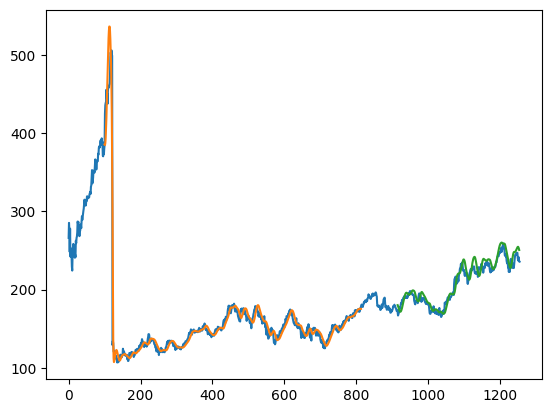

In [ ]:
# Plotting
# Shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.3073262366938008,
 0.3060738885410143,
 0.3023418910457107,
 0.3117345021916092,
 0.31812147777082017,
 0.3129367564182843,
 0.3138634940513462,
 0.3210018785222291,
 0.3247088290544771,
 0.32315591734502186,
 0.3103819661865998,
 0.3099060738885409,
 0.3120100187852222,
 0.31699436443331247,
 0.3176706324358171,
 0.30872886662492166,
 0.29823418910457106,
 0.29072010018785216,
 0.28846587351283653,
 0.29207263619286156,
 0.29024420788979327,
 0.30216656230432054,
 0.3008641202254226,
 0.29402629931120844,
 0.29402629931120844,
 0.29625547902316846,
 0.30402003757044455,
 0.2959549154664996,
 0.30351909830932994,
 0.30417031934877886,
 0.30597370068879143,
 0.30477144646211646,
 0.3081527864746399,
 0.3156668753913588,
 0.32115216030056354,
 0.3208265497808391,
 0.32683782091421415,
 0.33249843456480893,
 0.34016280525986226,
 0.34106449592986837,
 0.34113963681903564,
 0.34063869755792103,
 0.3504320601127113,
 0.35298685034439575,
 0.34978083907326235,
 0.35346274264245453,
 0.353

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.34775355]
101
1 day input [0.30607389 0.30234189 0.3117345  0.31812148 0.31293676 0.31386349
 0.32100188 0.32470883 0.32315592 0.31038197 0.30990607 0.31201002
 0.31699436 0.31767063 0.30872887 0.29823419 0.2907201  0.28846587
 0.29207264 0.29024421 0.30216656 0.30086412 0.2940263  0.2940263
 0.29625548 0.30402004 0.29595492 0.3035191  0.30417032 0.3059737
 0.30477145 0.30815279 0.31566688 0.32115216 0.32082655 0.32683782
 0.33249843 0.34016281 0.3410645  0.34113964 0.3406387  0.35043206
 0.35298685 0.34978084 0.35346274 0.35388854 0.36117721 0.36728867
 0.35368817 0.35804634 0.36981841 0.37177207 0.37911083 0.38116468
 0.37257358 0.36408265 0.3596243  0.34316844 0.34194114 0.34604884
 0.33906074 0.34028804 0.32563557 0.31949906 0.3166938  0.32819036
 0.30412023 0.3084283  0.29004383 0.29302442 0.29259862 0.29039449
 0.30812774 0.32916719 0.33192235 0.32748904 0.32350657 0.30349405
 0.31549155 0.314665   0.31654352 0.30254227 0.30259236 0.3150407
 0.32568566 0.33735755 0.34504696 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1255

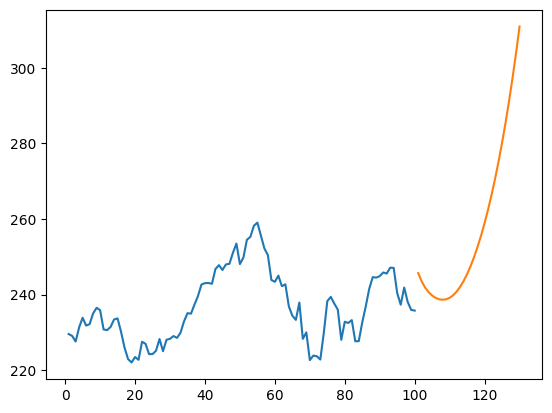

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df1[1155:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

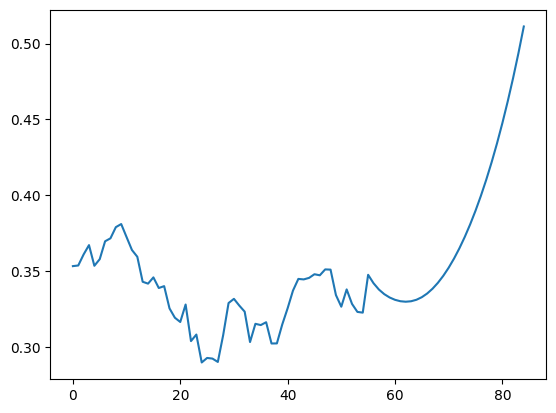

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

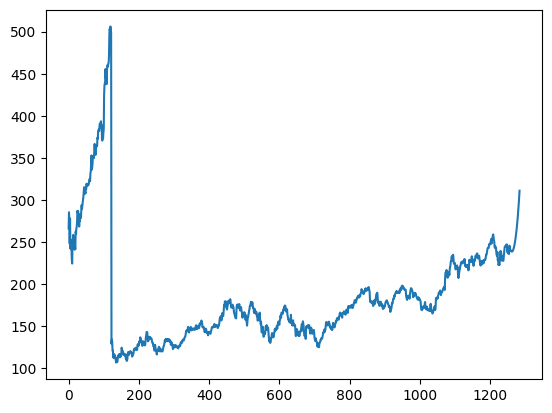

In [ ]:
plt.plot(df3)